In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Lendo dados 

In [2]:
dadosTeste = pd.read_csv('train.csv')
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
dadosTeste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## Clean data

In [4]:
from datetime import datetime

In [5]:
def parserData(texto):
    return datetime.strptime(texto,'%Y-%m-%d %H:%M:%S')
dadosTeste['datetime'] = dadosTeste['datetime'].apply(parserData)

In [6]:
dadosTeste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


## Serie temporal

** salvando data como index **

In [7]:
dadosTeste.index = dadosTeste['datetime']

In [8]:
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


** Mostrando serie de contagem **

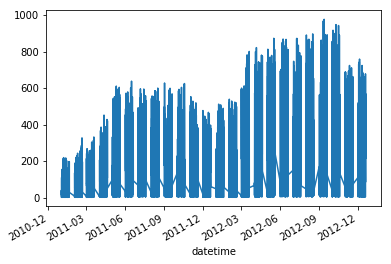

In [9]:
dadosTeste['count'].plot()

** Perceba q alguns dadas estão faltando, vamos analisar somente o ano de 2011 **

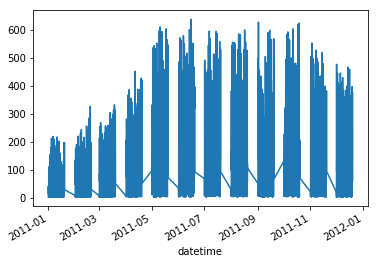

In [10]:
dadosTeste['2011']['count'].plot()

** Verificando somente um mes de 2011 **

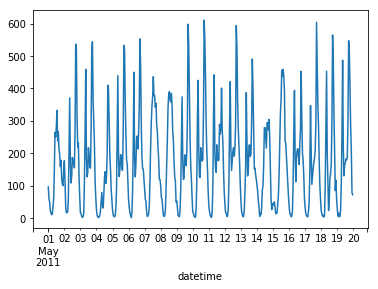

In [11]:
dadosTeste['2011-05']['count'].plot()

** Veja que os valores vão somente ate o dia 20, isto e algo recorrente em todos os meses **

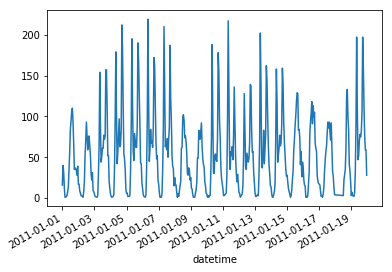

In [12]:
dadosTeste['2011-01']['count'].plot()

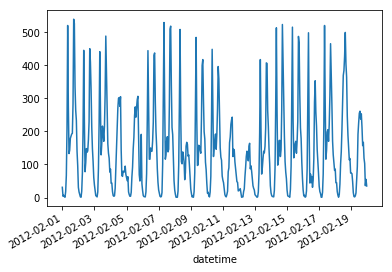

In [13]:
dadosTeste['2012-02']['count'].plot()

** Não contem dados apôs o dia 20 de cada mês **

** Demonstrando a serie temporal com soma dos valores por mês **

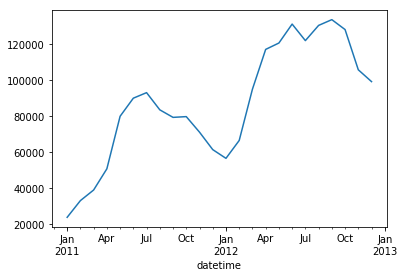

In [14]:
dadosTeste.groupby(pd.Grouper(freq='M')).sum()['count'].plot()

** Verificando valores por dados individuais da data **

** Tratando os dado **

** Tabela somente com os mes**

In [15]:
def parserMes(data):
    return data.month
dadosTeste['mes'] = dadosTeste['datetime'].apply(parserMes)

In [16]:
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


** Distribuição de valores por mes do ano **

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


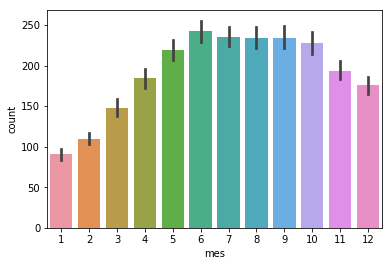

In [17]:
sns.barplot(data=dadosTeste,x='mes',y='count')

** Tabela com os dias **

In [18]:
def parserDia(data):
    return data.day
dadosTeste['dia'] = dadosTeste['datetime'].apply(parserDia)

In [19]:
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes,dia
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1


** Tabela com as horas **

In [20]:
def parserHoras(data):
    return data.hour
dadosTeste['hora'] = dadosTeste['datetime'].apply(parserHoras)

In [21]:
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes,dia,hora
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


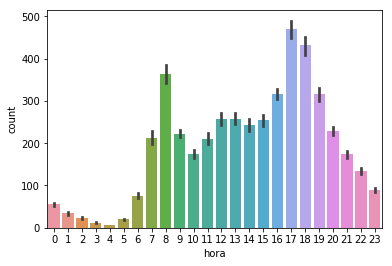

In [22]:
sns.barplot(data=dadosTeste,x='hora',y='count')

** Tabela com dias da semana **

In [23]:
def parserDiasSemana(data):
    return data.weekday()
dadosTeste['diaSemana'] = dadosTeste['datetime'].apply(parserDiasSemana)

In [24]:
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes,dia,hora,diaSemana
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5


C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


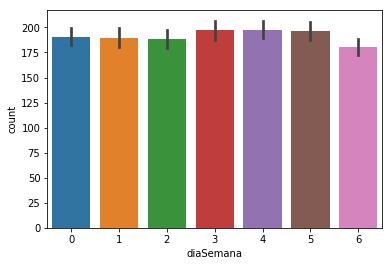

In [25]:
sns.barplot(data=dadosTeste,x='diaSemana',y='count')

** Tabela com as anos **

In [26]:
def parserAnos(data):
    return data.year
dadosTeste['anos'] = dadosTeste['datetime'].apply(parserAnos)

In [27]:
dadosTeste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes,dia,hora,diaSemana,anos
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5,2011
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5,2011
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5,2011


### Graficos de calor

** Pivot Tabel **

In [28]:
pivotH_D = dadosTeste.pivot_table(index='dia',columns='hora',aggfunc=np.sum)
pivotH_D

anos                                                                 \
hora     0      1      2      3      4      5      6      7      8      9    
dia                                                                          
1     48276  48276  48276  48276  46265  48276  48276  48276  48276  48276   
2     48276  48276  48276  44252  48276  46265  48276  48276  48276  48276   
3     48276  48276  46265  46265  46265  48276  48276  48276  48276  48276   
4     48276  48276  48276  46265  46265  48276  48276  48276  48276  48276   
5     48276  48276  48276  46265  48276  48276  48276  48276  48276  48276   
6     48276  46265  48276  44253  48276  46265  48276  48276  48276  48276   
7     48276  48276  46265  46265  48276  48276  48276  48276  48276  48276   
8     48276  48276  46265  46264  48276  48276  48276  48276  48276  48276   
9     48276  48276  48276  48276  46265  48276  48276  48276  48276  48276   
10    48276  48276  48276  42242  46265  48276  48276  48276  48276  48276   
11    48276  48276  46264  42243  40231  48276  48276  48276  48276  48276   
12    48276  48276  48276  44254  46265  48276  48276  48276  48276  48276   
13    48276  48276  46265  48276  48276  46265  48276  48276  48276  48276   
14    48276  48276  48276  48276  44254  48276  48276  48276  48276  48276   
15    48276  48276  48276  44254  48276  48276  48276  48276  48276  48276   
16    48276  48276  44254  48276  48276  48276  48276  48276  48276  48276   
17    48276  48276  48276  46264  48276  48276  48276  48276  48276  48276   
18    46265  46265  46265  46265  44254  46265  46265  46265  46265  46265   
19    48276  48276  48276  44254  48276  48276  48276  48276  48276  48276   

     ... workingday                                      
hora ...         14  15  16  17  18  19  20  21  22  23  
dia  ...                                                 
1    ...         16  16  16  16  16  16  16  16  16  16  
2    ...         16  16  16  16  16  16  16  16  16  16  
3    ...         16  16  16  16  16  16  16  16  16  16  
4    ...         15  15  15  15  15  15  15  15  15  15  
5    ...         16  16  16  16  16  16  16  16  16  16  
6    ...         18  18  18  18  18  18  18  18  18  18  
7    ...         18  18  18  18  18  18  18  18  18  18  
8    ...         15  15  15  15  15  15  15  15  15  15  
9    ...         17  17  17  17  17  17  17  17  17  17  
10   ...         16  16  16  16  16  16  16  16  16  16  
11   ...         16  16  16  16  16  16  16  16  16  16  
12   ...         16  16  16  16  16  16  16  16  16  16  
13   ...         18  18  18  18  18  18  18  18  18  18  
14   ...         18  18  18  18  18  18  18  18  18  18  
15   ...         15  15  15  15  15  15  15  15  15  15  
16   ...         15  15  15  15  15  15  15  15  15  15  
17   ...         16  16  16  16  16  16  16  16  16  16  
18   ...         17  17  17  17  17  17  17  17  17  17  
19   ...         17  17  17  17  17  17  17  17  17  17  

[19 rows x 336 columns]

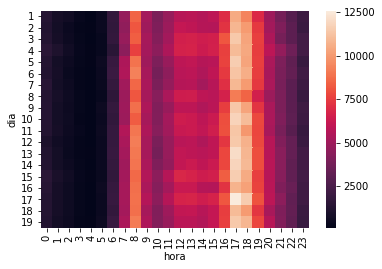

In [29]:
sns.heatmap(pivotH_D['count'])

In [30]:
pivotD_M = dadosTeste.pivot_table(index='dia',columns='mes',aggfunc=np.sum)
pivotD_M

anos                                                                ...  \
mes     1      2      3      4      5      6      7      8      9      10 ...   
dia                                                                       ...   
1    96552  94541  96552  96552  96552  96552  96552  96552  96552  96552 ...   
2    92529  96552  96552  94540  96552  96552  96552  96552  96552  96552 ...   
3    92530  94541  96552  96552  96552  96552  96552  96552  96552  96552 ...   
4    94541  94541  96552  96552  96552  96552  96552  96552  96552  96552 ...   
5    94541  96552  96552  96552  96552  96552  96552  96552  96552  96552 ...   
6    94541  94540  94541  96552  96552  96552  96552  96552  94541  96552 ...   
7    94541  96552  94541  96552  96552  96552  96552  96552  96552  96552 ...   
8    96552  96552  96552  96552  96552  96552  96552  96552  94541  96552 ...   
9    96552  94541  96552  96552  96552  96552  96552  96552  96552  96552 ...   
10   94540  94541  92530  96552  96552  96552  96552  96552  96552  96552 ...   
11   92530  92530  92529  92529  96552  96552  96552  96552  96552  96552 ...   
12   92530  96552  96552  96552  96552  96552  96552  96552  94541  96552 ...   
13   96552  94541  94541  96552  96552  96552  96552  96552  96552  96552 ...   
14   94541  96552  94541  96552  96552  96552  96552  96552  96552  96552 ...   
15   96552  94541  94541  96552  96552  96552  96552  96552  96552  96552 ...   
16   96552  94541  94541  96552  96552  96552  96552  96552  96552  96552 ...   
17   94540  96552  96552  96552  96552  96552  96552  96552  96552  96552 ...   
18   72420  96552  94541  96552  96552  96552  96552  96552  96552  96552 ...   
19   94541  96552  96552  96552  96552  96552  96552  96552  96552  94541 ...   

    workingday                                      
mes         3   4   5   6   7   8   9   10  11  12  
dia                                                 
1           48  24  24  48  24  48  24  24  48  24  
2           48  23  48  24  24  48  24  24  48  24  
3           24  24  48  24  24  48   0  48  24  24  
4           24  48  48  24   0  24  24  48  24  24  
5           24  48  24  24  48  24  24  48  24  48  
6           24  48  24  48  48  24  47  24  24  48  
7           47  24  24  48  24  24  48  24  48  48  
8           48  24  24  48  24  48  23   0  47  24  
9           48  24  48  24  24  48  24  24  48  24  
10          22  24  48  24  24  48  24  24  24  24  
11          23  46  48  24  48  24  24  48   0  24  
12          24  48  24  24  48  24  47  48   0  48  
13          24  48  24  48  48  24  48  24  24  48  
14          47  24  24  48  24  24  48  24  48  48  
15          47   0  24  48  24  48  24  24  48  24  
16          47   0  48  24  24  48  24  24  48  24  
17          24  24  48  24  24  48  24  48  24  24  
18          23  48  48  24  48  24  24  48  24  24  
19          24  48  24  24  48  24  48  47  24  48  

[19 rows x 168 columns]

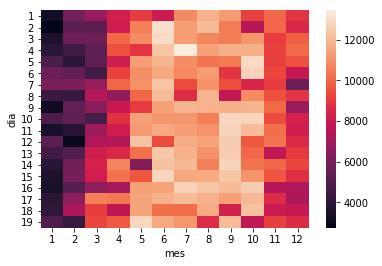

In [31]:
sns.heatmap(pivotD_M['count'])

In [32]:
pivotD_M = dadosTeste.pivot_table(index='diaSemana',columns='hora',aggfunc=np.sum)
pivotD_M

anos                                                          \
hora           0       1       2       3       4       5       6       7    
diaSemana                                                                   
0          130748  130748  126726  118679  128737  130748  130748  130748   
1          128736  126725  128736  116668  124714  128736  128736  128736   
2          130748  130748  126726  122704  124714  130748  130748  130748   
3          130748  130748  128737  122703  126726  130748  130748  130748   
4          128735  128735  128735  124713  118680  128735  128735  128735   
5          132758  132758  132758  132758  132758  132758  132758  132758   
6          132760  132760  128737  132760  132760  126727  132760  132760   

                          ... workingday                                      
hora           8       9  ...         14  15  16  17  18  19  20  21  22  23  
diaSemana                 ...                                                 
0          130748  130748 ...         55  55  55  55  55  55  55  55  55  55  
1          128736  128736 ...         65  65  65  65  65  65  65  65  65  65  
2          130748  130748 ...         64  64  64  64  64  64  64  64  64  64  
3          130748  130748 ...         65  65  65  65  65  65  65  65  65  65  
4          128735  128735 ...         62  62  62  62  62  62  62  62  62  62  
5          132758  132758 ...          0   0   0   0   0   0   0   0   0   0  
6          132760  132760 ...          0   0   0   0   0   0   0   0   0   0  

[7 rows x 336 columns]

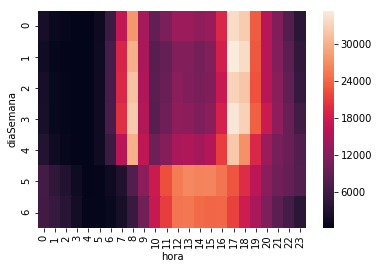

In [33]:
sns.heatmap(pivotD_M['count'])

** Correlação **

In [34]:
dadosTeste.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes,dia,hora,diaSemana,anos
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,0.001729,-0.006546,-0.010553,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.015877,-0.000354,-0.191832,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,0.009829,0.002780,-0.704267,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.007890,-0.022740,-0.047692,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.015551,0.145430,-0.038466,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.011866,0.140343,-0.040235,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.011335,-0.278011,-0.026507,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,0.036157,0.146631,-0.024804,-0.015221
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.014109,0.302045,0.246959,0.145241
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.019111,0.380540,-0.084427,0.264265


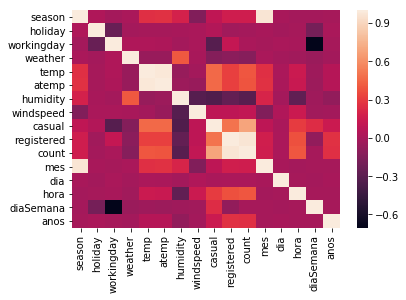

In [35]:
sns.heatmap(dadosTeste.corr())

## Aplicando Machine Learning

** Separando dados **

In [36]:
y = dadosTeste['count']
x = dadosTeste.drop(['count','datetime','casual','registered'],axis=1)

Separando dados de treino e teste

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y)

### Regressão Linear

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(xTreino,yTreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
preditos = lr.predict(xTeste)

** comparando valores **

In [42]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error

In [43]:
mean_absolute_error(preditos,yTeste)

105.46321868227982

In [44]:
# mean_squared_log_error(preditos,yTeste) #Não e possivel pois contêm valores muitos grandes

### Regressão Knn

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(xTreino,yTreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [46]:
preditos = knn.predict(xTeste)

In [47]:
mean_absolute_error(preditos,yTeste)

84.0215282880235

In [48]:
mean_squared_log_error(preditos,yTeste)

0.8687184419407656

** Tuning Knn **

** Normalizando dados**

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
norm = StandardScaler()
# norm.fit(xTreino.append(xTeste))
xTreinoNorm = norm.fit_transform(xTreino)
xTesteNorm = norm.fit_transform(xTeste)

In [51]:
knn = KNeighborsRegressor()
knn.fit(xTreinoNorm,yTreino)
preditos = knn.predict(xTesteNorm)

In [52]:
mean_absolute_error(preditos,yTeste)

82.74386480529023

In [53]:
mean_squared_log_error(preditos,yTeste)

0.9689729619065384

** Encontrando melhor vizinho **

In [54]:
listaErroAbs = []
listaErroLog = []
for nVizinhos in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=nVizinhos)
    knn.fit(xTreino,yTreino)
    preditos = knn.predict(xTeste)
    erroAbs = mean_absolute_error(preditos,yTeste)
    errorLog = mean_squared_log_error(preditos,yTeste)
    listaErroAbs.append(erroAbs)
    listaErroLog.append(errorLog)

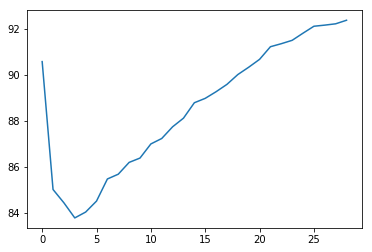

In [55]:
plt.plot(listaErroAbs)

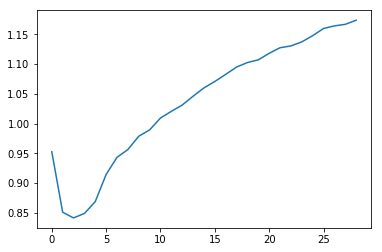

In [56]:
plt.plot(listaErroLog)

** Menores erros **

In [57]:
listaErroAbs = np.array(listaErroAbs)
listaErroLog = np.array(listaErroLog)
print("Menor error Absoluto:\nError:{}\nNumero de Vizinhos:{}".format(listaErroAbs.min(),listaErroAbs.argmin()))
print('\n')
print("Menor error Logaritmo:\nError:{}\nNumero de Vizinhos:{}".format(listaErroLog.min(),listaErroLog.argmin()))

Menor error Absoluto:
Error:83.76644011756062
Numero de Vizinhos:3


Menor error Logaritmo:
Error:0.8412498664280796
Numero de Vizinhos:2


### Regressão Arv

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xTreino,yTreino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
preditos = dt.predict(xTeste)

In [60]:
print(mean_absolute_error(preditos,yTeste))
print(mean_squared_log_error(preditos,yTeste))

50.54592211609111
0.2895189503262062


** Tunning Arv **

**Trocando criterio**

In [61]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xTreino,yTreino)
preditos = dt.predict(xTeste)

In [62]:
print(mean_absolute_error(preditos,yTeste))
print(mean_squared_log_error(preditos,yTeste))

64.74210139603233
0.3230592346837982


** max depth **

In [63]:
listaErroAbs = []
listaErroLog = []
for depth in range(1,30):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(xTreino,yTreino)
    preditos = dt.predict(xTeste)
    erroAbs = mean_absolute_error(preditos,yTeste)
    errorLog = mean_squared_log_error(preditos,yTeste)
    listaErroAbs.append(erroAbs)
    listaErroLog.append(errorLog)

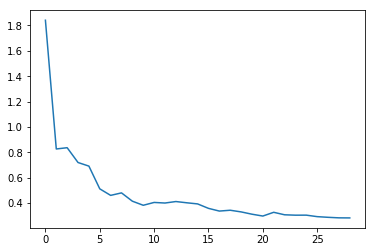

In [64]:
plt.plot(listaErroLog)

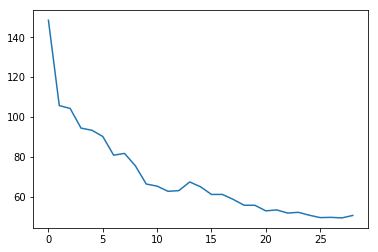

In [65]:
plt.plot(listaErroAbs)

** Min sample split **

In [66]:
listaErroAbs = []
listaErroLog = []
for value in np.arange(0.1,1,0.1):
    dt = DecisionTreeClassifier(min_samples_split=value)
    dt.fit(xTreino,yTreino)
    preditos = dt.predict(xTeste)
    erroAbs = mean_absolute_error(preditos,yTeste)
    errorLog = mean_squared_log_error(preditos,yTeste)
    listaErroAbs.append(erroAbs)
    listaErroLog.append(errorLog)

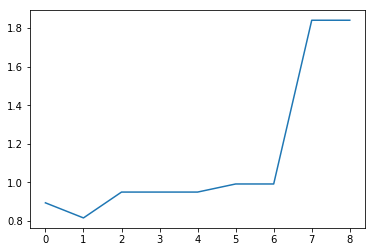

In [67]:
plt.plot(listaErroLog)

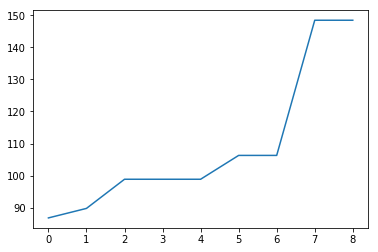

In [68]:
plt.plot(listaErroAbs)

** Min sample left **

In [69]:
#max depth
listaErroAbs = []
listaErroLog = []
for value in np.arange(0.1,0.5,0.05):
    dt = DecisionTreeClassifier(min_samples_leaf=value)
    dt.fit(xTreino,yTreino)
    preditos = dt.predict(xTeste)
    erroAbs = mean_absolute_error(preditos,yTeste)
    errorLog = mean_squared_log_error(preditos,yTeste)
    listaErroAbs.append(erroAbs)
    listaErroLog.append(errorLog)

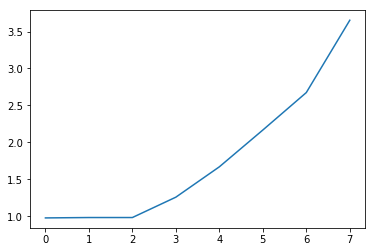

In [70]:
plt.plot(listaErroLog)

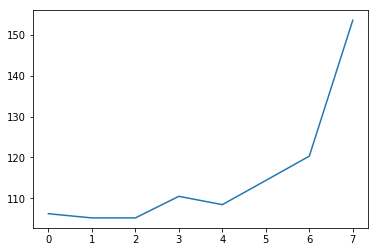

In [71]:
plt.plot(listaErroAbs)

** max feature**

In [72]:
#max depth
listaErroAbs = []
listaErroLog = []
for value in np.arange(1,13):
    dt = DecisionTreeClassifier(max_features=value)
    dt.fit(xTreino,yTreino)
    preditos = dt.predict(xTeste)
    erroAbs = mean_absolute_error(preditos,yTeste)
    errorLog = mean_squared_log_error(preditos,yTeste)
    listaErroAbs.append(erroAbs)
    listaErroLog.append(errorLog)

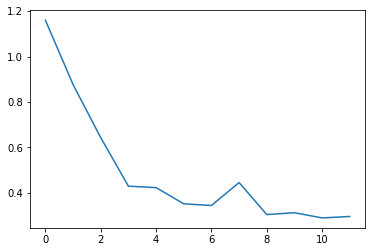

In [73]:
plt.plot(listaErroLog)

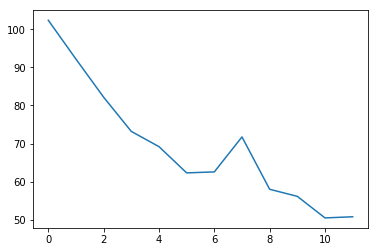

In [74]:
plt.plot(listaErroAbs)

### Regressão Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

C:\ProgramData\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [76]:
rf = RandomForestRegressor()
rf.fit(xTreino,yTreino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
preditos = rf.predict(xTeste)

In [78]:
print(mean_absolute_error(preditos,yTeste))
print(mean_squared_log_error(preditos,yTeste))

26.138060249816306
0.1117397804201677


**Tunning**

** Alterando n_estimators**

In [79]:
#max depth
listaErroAbs = []
listaErroLog = []
for value in np.arange(1,30):
    rf = RandomForestRegressor(n_estimators=value)
    rf.fit(xTreino,yTreino)
    preditos = rf.predict(xTeste)
    erroAbs = mean_absolute_error(preditos,yTeste)
    errorLog = mean_squared_log_error(preditos,yTeste)
    listaErroAbs.append(erroAbs)
    listaErroLog.append(errorLog)

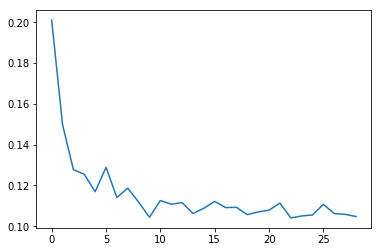

In [80]:
plt.plot(listaErroLog)

In [81]:
listaErroLog = np.array(listaErroLog)
print("min {}, argmin {}".format(listaErroLog.min(),listaErroLog.argmin()))

min 0.10406486079355155, argmin 22


** SVM **

In [82]:
from sklearn.svm import SVC

In [83]:
svm = SVC()
svm.fit(xTreino,yTreino)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
preditos = svm.predict(xTeste)

In [85]:
print(mean_absolute_error(preditos,yTeste))
print(mean_squared_log_error(preditos,yTeste))

183.52204261572373
9.426129445259853


** Tuning SVM**

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# grid = GridSearchCV(SVC(),{'gamma':[10,1,0.1,0.01],'C':[1000,100,10,1]},verbose=2)
# grid.fit(xTreino,yTreino)

In [88]:
# preditos = grid.predict(xTeste)

In [89]:
# print(mean_absolute_error(preditos,yTeste))
# print(mean_squared_log_error(preditos,yTeste))

** MLP **

In [90]:
from sklearn.neural_network import MLPRegressor

In [91]:
mlp = MLPRegressor()
mlp.fit(xTreino,yTreino)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [92]:
preditos = mlp.predict(xTeste)

In [93]:
print(mean_absolute_error(preditos,yTeste))
# print(mean_squared_log_error(preditos,yTeste))

108.20463708834625


**XGBoost**

In [94]:
import xgboost as xgb

In [95]:
xg_reg = xgb.XGBRegressor()

In [96]:
xg_reg.fit(xTreino,yTreino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
preditos = xg_reg.predict(xTeste)

In [98]:
print(mean_absolute_error(preditos,yTeste))
# print(mean_squared_log_error(preditos,yTeste))

44.922638371838616


** Predizendo dados de teste **

In [99]:
dadosTeste2 = pd.read_csv('test.csv')

In [100]:
def parserData(texto):
    return datetime.strptime(texto,'%Y-%m-%d %H:%M:%S')
dadosTeste2['datetime'] = dadosTeste2['datetime'].apply(parserData)

In [101]:
dadosTeste2['diaSemana'] = dadosTeste2['datetime'].apply(parserDiasSemana)
dadosTeste2['mes'] = dadosTeste2['datetime'].apply(parserMes)
dadosTeste2['dia'] = dadosTeste2['datetime'].apply(parserDia)
dadosTeste2['hora'] = dadosTeste2['datetime'].apply(parserHoras)
dadosTeste2['anos'] = dadosTeste2['datetime'].apply(parserAnos)

In [102]:
dadosTeste2.index = dadosTeste2['datetime']

In [103]:
dadosTeste2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,diaSemana,mes,dia,hora,anos
datetime,,,,,,,,,,,,,,
2011-01-20 00:00:00,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,3,1,20,0,2011
2011-01-20 01:00:00,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,1,20,1,2011
2011-01-20 02:00:00,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,1,20,2,2011
2011-01-20 03:00:00,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,20,3,2011
2011-01-20 04:00:00,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,20,4,2011


In [104]:
xTreino.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,mes,dia,hora,diaSemana,anos
datetime,,,,,,,,,,,,,
2011-10-12 13:00:00,4,0,1,3,22.14,25.760,88,15.0013,10,12,13,2,2011
2012-02-18 12:00:00,1,0,0,1,14.76,17.425,43,12.9980,2,18,12,5,2012
2011-01-12 17:00:00,1,0,1,1,8.20,9.090,47,23.9994,1,12,17,2,2011
2011-12-19 14:00:00,4,0,1,1,14.76,17.425,46,15.0013,12,19,14,0,2011
2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,1,16,6,0,2012


In [105]:
mlp = MLPRegressor()
mlp.fit(xTreino,yTreino)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [112]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(xTreino,yTreino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [113]:
preditos = xg_reg.predict(x)

In [114]:
print(mean_squared_log_error(preditos,y))

C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [115]:
xTeste = dadosTeste2.drop(['datetime'],axis=1)

In [117]:
saida = xg_reg.predict(xTeste)

ValueError: feature_names mismatch: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'mes', 'dia', 'hora', 'diaSemana', 'anos'] ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'diaSemana', 'mes', 'dia', 'hora', 'anos']

In [ ]:
dfSaida = pd.DataFrame(saida,index=dadosTeste2.index)

In [ ]:
dfSaida.to_csv('saida2.csv')

In [ ]:
dfSaida[:5]